Entonces, estábamos yo y mi amigo Diego un día muy tranquilos en la escalera de la facultad cuando se nos acercó un señor canoso interesado en nuestros conocimientos estadísticos, se llamaba Larry Capija, nos explicó sobre como tená mucho dinero y que estaba valorando la idea de comprarse una casa...sin necesidad de recurrir a nuestros conocimientos estadísticos le explicamos sobre la mala idea que era asentarse aquí en Cuba en estos tiempos, pero nos explicó que estaba valorando California(Estados Unidos) como su hogar, que la razon por la que venía a Cuba era simplemente porque le salía más barato contratarnos a nosotros que a un yanqui consumista e imperialista (tremendo izquierdo el Larry), entonces nos hizo entrega de una base de datos sobre Casas en California y nos dio un plazo de una semana para darle una primera entrega de nuestras investigaciones sobre que lugar era mejor para vivir.(junto con el dataset vinieron 100 usd así que nos pusimos las pilas)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Empezamos viendo de que iba el dataset, y lo tratamos un poco ya que este venía con algunas ambigüedades.

In [2]:
data=pd.read_csv("housing.csv")


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Qué significa cada columna?

1. longitude: Longitud

2. latitude: latitud
3. housingMedianAge: Edad media de las casas dentro de un bloque; un número más bajo indica una construcción más reciente.

4. totalRooms: Número total de habitaciones dentro de un bloque.

5. totalBedrooms: Número total de dormitorios dentro de un bloque.

6. population: Número total de personas que residen dentro de un bloque.

7. households: Número total de hogares dentro de un bloque, donde un hogar es un grupo de personas que residen en una unidad de vivienda.

8. medianIncome:  Ingreso medio de los hogares dentro de un bloque de viviendas (medido en decenas de miles de dólares estadounidenses).

9. medianHouseValue: Valor medio de las casas para los hogares dentro de un bloque (medido en dólares estadounidenses).

10. oceanProximity: Ubicación de la casa con respecto al océano/mar.


longitude

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


tratamos la tabla para que la información sea concisa

In [5]:
data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Visualización en forma de histograma

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

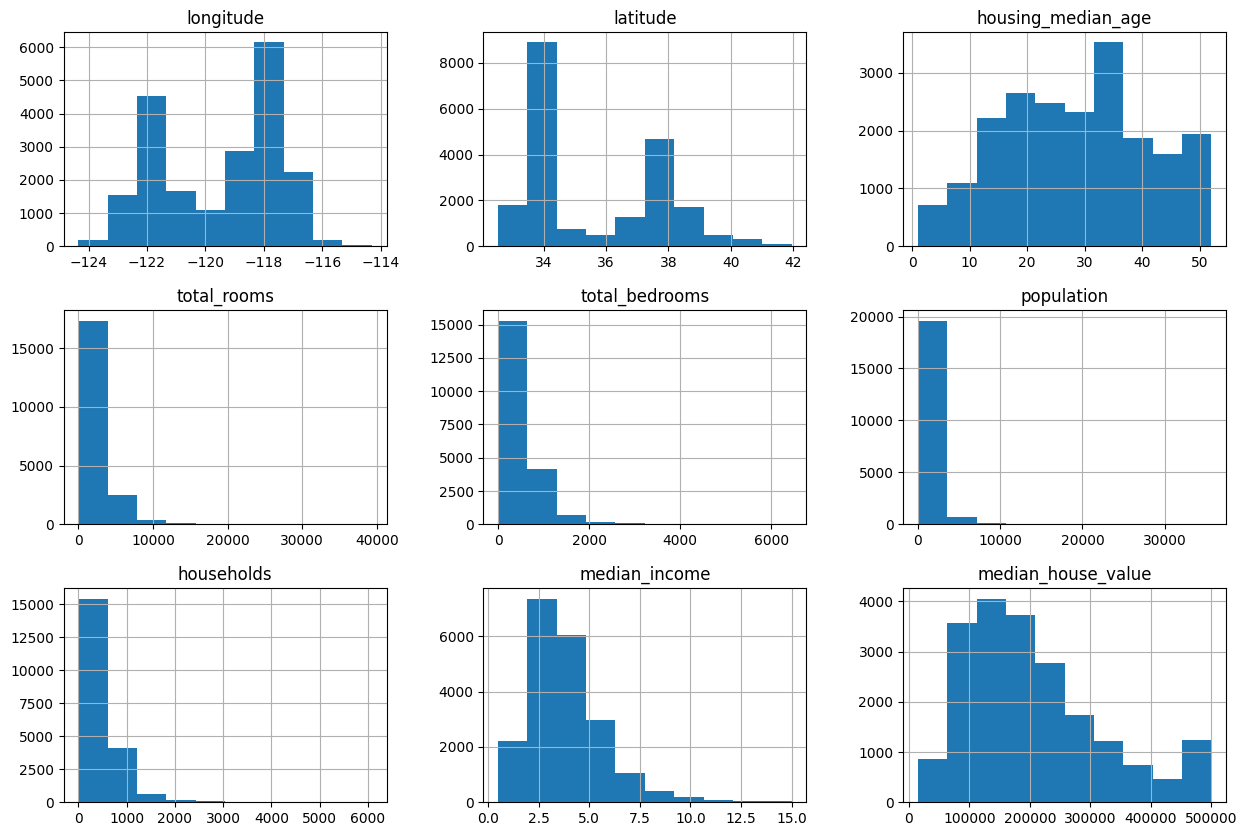

In [6]:
data.hist(figsize=(15,10))

definimos una función para que quedasen mejor representadas las distribuciones de cada valor

In [7]:
def columns_histplot(data):
    l = len(data.columns)
    plt.figure(figsize=(15, 10))
    for i in range(l):
        try:
            plt.subplot(3, 3, i+1 )
            sns.histplot(data[data.columns[i]], bins=10, kde=True)
        except ValueError:
            break
       
       
      

    plt.tight_layout()
    plt.show()

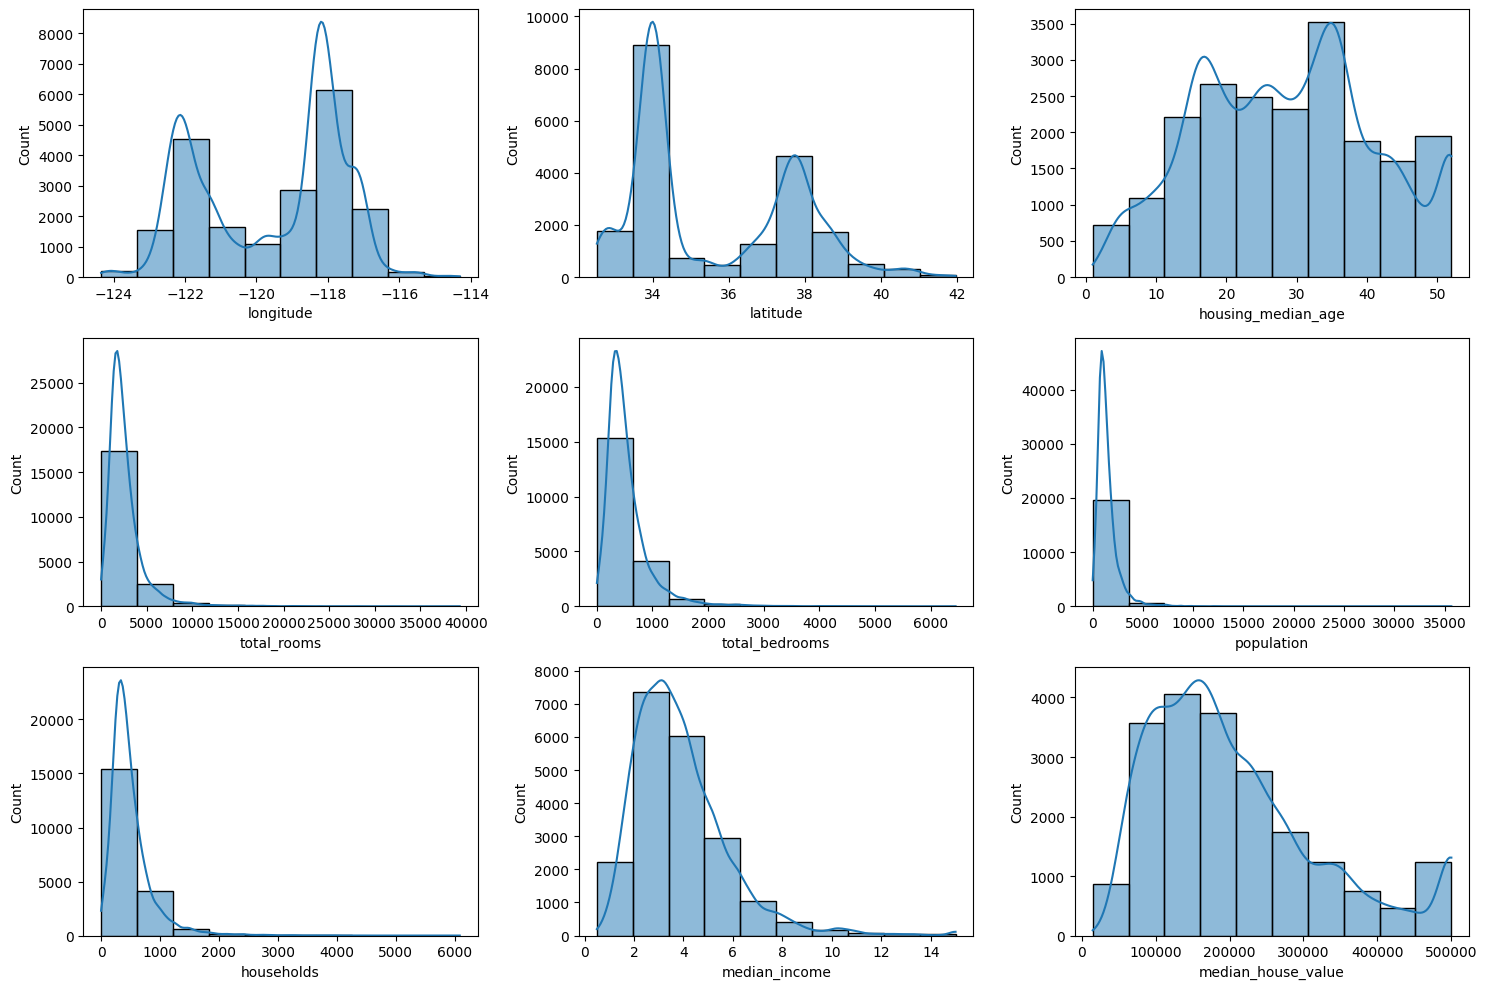

In [8]:

columns_histplot(data)

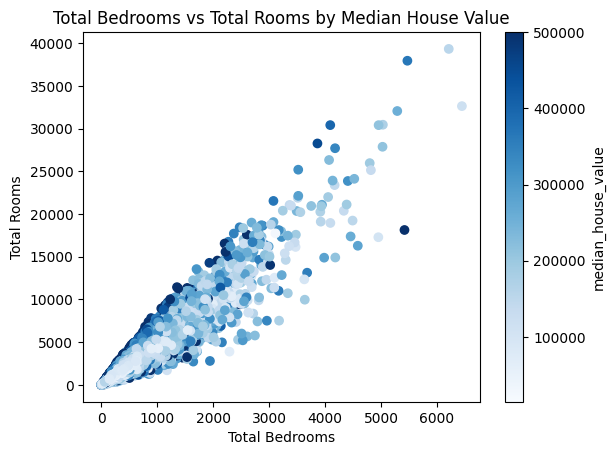

In [9]:
scatter = plt.scatter(data['total_bedrooms'], data['total_rooms'], c=data['median_house_value'],cmap='Blues')

plt.title('Total Bedrooms vs Total Rooms by Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')

cbar = plt.colorbar(scatter)
cbar.set_label('median_house_value')

plt.show()

Aqui volvemos a tratar nuestra tabla, ya que la columna 'ocean_proximity' contenía valores tipo string lo cual no nos resulta útil, asi que decidimos convertir los posibles valores de esa columna en nuevas columnas y llenar con ceros y unos a modo de true or false de forma que nos permitiese sacar mas información de la tabla, la razón principal es porque entendimos que no tenía sentido no hacer uso de esos datos, ya que necesitabamos una correlación lo más específica posible en cuanto a localidad-precio

In [10]:
data =data.join(pd.get_dummies(data.ocean_proximity, dtype='int')).drop(['ocean_proximity'], axis=1)

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


aquí vemos un mapa de correlación entre los valores de la tabla, notemos como influyen las localizaciones de los bloques respecto al mar en cuanto al precio de las casas en dicho bloque

<Axes: >

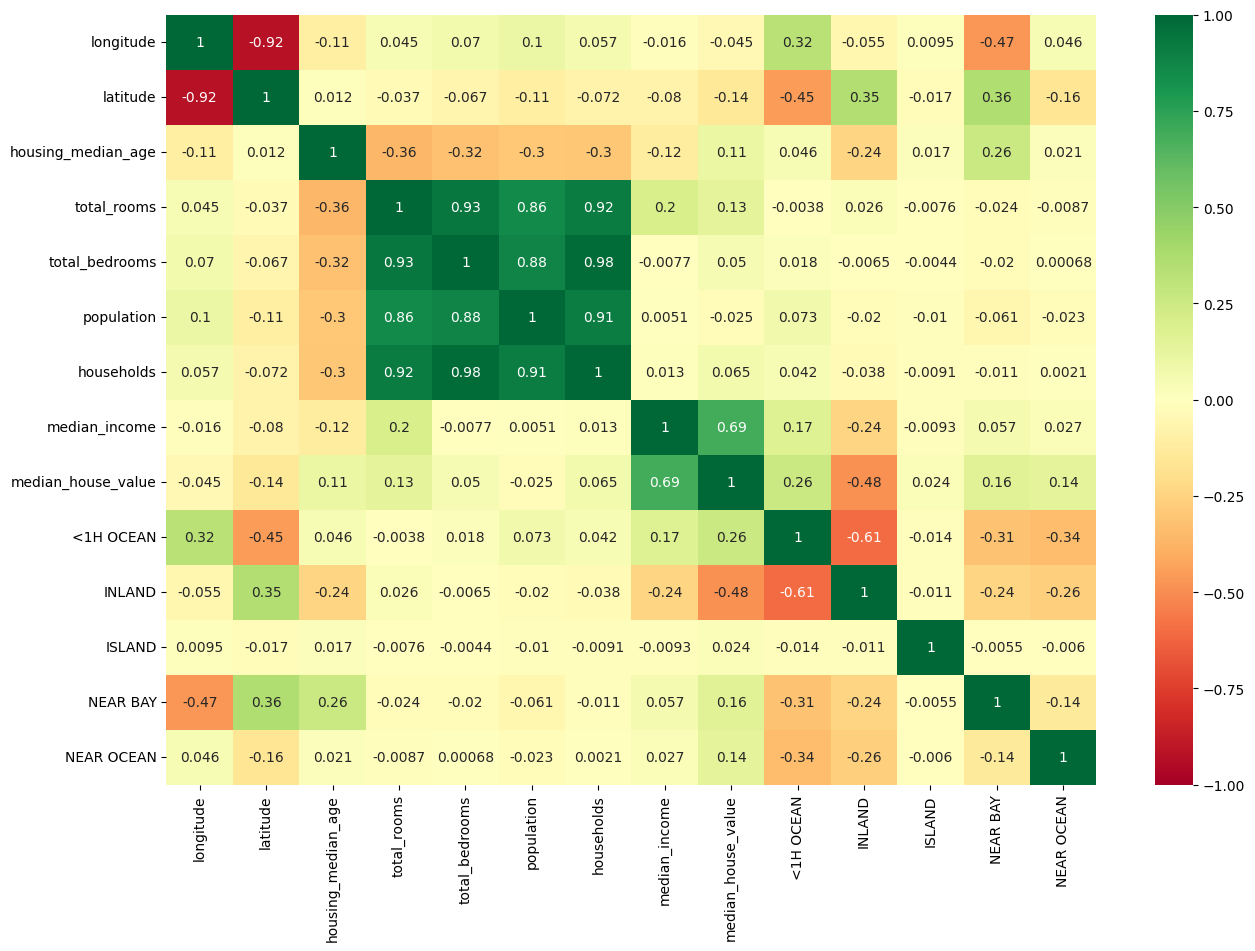

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='RdYlGn',vmin=-1, vmax=1, annot=True)

aquí ploteamos la información usando latitud y longitud como coordenadas para tener un mapa de California, y ver en donde se encuentran las zonas más caras

In [13]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="median_house_value", 
                        hover_data=["median_house_value"],
                        color="median_house_value",
                        color_continuous_scale=color_scale,
                        size="median_house_value",
                        zoom=7, 
                        height=1000,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

En pleno proceso de análisis, nos llegó un correo de nuestro querido cliente Larry, con el título de "Importante, cambien de lugar", en el nos explicaba como le habían comentado sus amigos que California era un edstado demócrata y que habían votado por Kamala todos allá, y como buen Trumpista que él era se negaba a aceptar un estado así, por lo que nos mandaba nueva información de su nuevo estado, Melbourne Australia!!! ... candela, a volver a empezar, pero sin perder mucho tiempo nos pusimos manos a la obra.